### Importing Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Dataset

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [47]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [48]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [49]:
df1 = df['Close']

In [50]:
df1.shape

(2035,)

Text(0, 0.5, 'Close values')

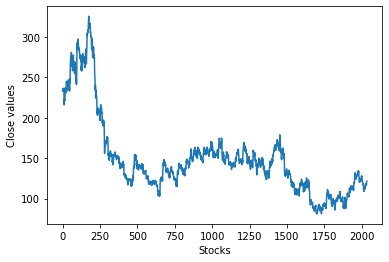

In [51]:
plt.plot(df1)
plt.xlabel('Stocks')
plt.ylabel('Close values')

In [52]:
print(df1.max())
print(df1.min())

325.75
80.95


### MinMaxScalar 

 LSTM are sensitive o scale of data, so we apply MinMax scaler to convert the data to a specific range (0-1)

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
# convertingthe values of Close to range 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

In [55]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [56]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [57]:
df1.shape

(2035, 1)

### Train-Test Data Splitting

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# consider the training size to be 65% of out data
training_size = int(len(df1) * 0.65)

test_size = len(df1) - training_size

print(training_size, test_size)

1322 713


In [60]:
train_data, test_data = df1[0:training_size], df1[training_size:len(df1)]

In [61]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [62]:
test_data

array([[0.24652778],
       [0.23611111],
       [0.25204248],
       [0.25919118],
       [0.25776144],
       [0.2681781 ],
       [0.25449346],
       [0.27103758],
       [0.24530229],
       [0.26756536],
       [0.27267157],
       [0.26633987],
       [0.27410131],
       [0.28615196],
       [0.27818627],
       [0.27205882],
       [0.27124183],
       [0.27798203],
       [0.27083333],
       [0.25857843],
       [0.24285131],
       [0.2250817 ],
       [0.23447712],
       [0.24346405],
       [0.23611111],
       [0.22937092],
       [0.21527778],
       [0.20976307],
       [0.20751634],
       [0.2060866 ],
       [0.20445261],
       [0.20098039],
       [0.21180556],
       [0.19301471],
       [0.18974673],
       [0.20302288],
       [0.21752451],
       [0.20629085],
       [0.19158497],
       [0.17381536],
       [0.17401961],
       [0.18361928],
       [0.17830882],
       [0.19362745],
       [0.20098039],
       [0.20486111],
       [0.21425654],
       [0.218

In [63]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [64]:
# reshape into X = t, t+1, t+2, t+3 .... Y = t+4 ----> time_step = 4

time_step = 100

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [65]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [66]:
X_train.shape

(1221, 100)

In [67]:
y_train.shape

(1221,)

In [68]:
X_test.shape

(612, 100)

In [69]:
y_test.shape

(612,)

In [70]:
# reshape input to be [samples, time_steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Creating a stacked LSTM Model

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [72]:
#22.00
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Model Training and Evaluation

In [74]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
20/20 [==============================] - 7s 167ms/step - loss: 0.0312 - val_loss: 0.0042
Epoch 2/100
20/20 [==============================] - 2s 120ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 3/100
20/20 [==============================] - 2s 124ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 4/100
20/20 [==============================] - 2s 119ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 5/100
20/20 [==============================] - 2s 120ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 6/100
20/20 [==============================] - 2s 119ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 7/100
20/20 [==============================] - 2s 125ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 8/100
20/20 [==============================] - 2s 120ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/100
20/20 [==============================] - 2s 122ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/100
20/20 [==============================] - 2s 120ms/step - loss: 0.0012 - val_lo

Epoch 77/100
20/20 [==============================] - 6s 326ms/step - loss: 2.9761e-04 - val_loss: 2.4434e-04
Epoch 78/100
20/20 [==============================] - 7s 339ms/step - loss: 2.7072e-04 - val_loss: 2.1506e-04
Epoch 79/100
20/20 [==============================] - 6s 326ms/step - loss: 2.8730e-04 - val_loss: 2.8950e-04
Epoch 80/100
20/20 [==============================] - 7s 351ms/step - loss: 2.8049e-04 - val_loss: 2.6980e-04
Epoch 81/100
20/20 [==============================] - 7s 360ms/step - loss: 2.4865e-04 - val_loss: 2.2003e-04
Epoch 82/100
20/20 [==============================] - 7s 327ms/step - loss: 4.2686e-04 - val_loss: 5.0485e-04
Epoch 83/100
20/20 [==============================] - 7s 328ms/step - loss: 3.6340e-04 - val_loss: 2.6629e-04
Epoch 84/100
20/20 [==============================] - 6s 327ms/step - loss: 3.1845e-04 - val_loss: 2.4633e-04
Epoch 85/100
20/20 [==============================] - 7s 341ms/step - loss: 2.4012e-04 - val_loss: 1.9791e-04
Epoch 86/1

In [75]:
import tensorflow as tf

In [76]:
tf.__version__

'2.11.0'

In [77]:
# predicting and checking the preformance matrix

train_predict = model.predict(X_train)

test_predict = model.predict(X_test)

20/20 [==============================] - 1s 65ms/step


In [78]:
# transform back to the original matrix

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [79]:
import math

In [81]:
# calculating RSME performance metrics

from sklearn.metrics import mean_squared_error

In [82]:
math.sqrt(mean_squared_error(y_train, train_predict))

164.42300930733137

In [83]:
math.sqrt(mean_squared_error(y_test, test_predict))

115.61377745668469

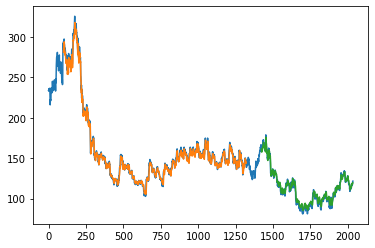

In [87]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPLot = np.empty_like(df1)
testPredictPLot[:, :] = np.nan
testPredictPLot[len(train_predict) + (look_back * 2) + 1: len(df1) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPLot)
plt.show()

In [ ]:
# 30.00
https://www.youtube.com/watch?v=H6du_pfuznE&t=1210s